# LIBRA example 2

Compiled: June 15, 2021.

PPJI metric: Integrated spaces preservation estimation from original independet omics. 

In [1]:
options(warn=-1)

###########################
#Prepare enviroment
set.seed(1234567)
options(stringsAsFactors = FALSE)

#Commented resourcess will be required for training the model
#library("keras")
#K <- keras::backend()
#tensorflow::tf$compat$v1$disable_eager_execution()
#print("backend mounted")

#Extra resources for manage data, clustering and visualization
library("Seurat")
library("scclusteval")
library("ggplot2")

print("Requirements loaded")
gc()



[1] "Requirements loaded"


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,1989422,106.3,4054785,216.6,2506890,133.9
Vcells,3371865,25.8,8388608,64.0,4559710,34.8


In [2]:
setwd("/your_path")
load("LIBRA_output.RData")
print("Loaded LIBRA output")


[1] "Loaded LIBRA output"


[1] "atac_preprocessed"                       
 [2] "atac_preprocessed_libras_base_clustering"
 [3] "cells_0"                                 
 [4] "LIBRA"                                   
 [5] "libra_prediction"                        
 [6] "libra_shared_space"                      
 [7] "n"                                       
 [8] "rna_preprocessed"                        
 [9] "rna_preprocessed_libras_base_clustering" 
[10] "x_train2"

**Pairwise Jaccard distance** between reference omic **RNA (y-axis)** clusters and integrated cluster obtain in **LIBRA (x-axis)**

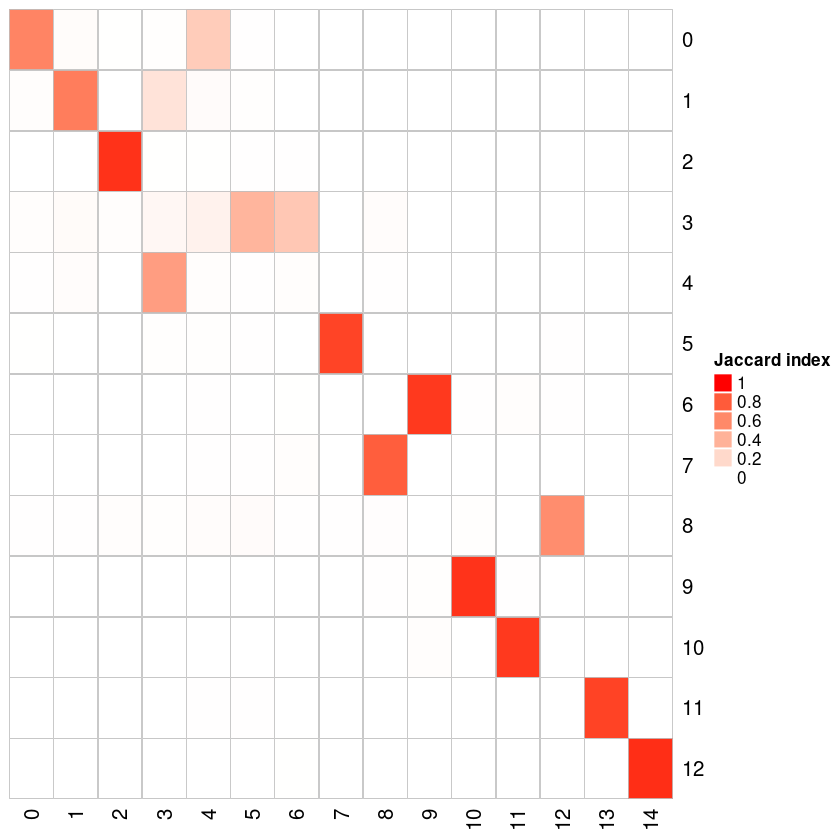

In [7]:
jacard=PairWiseJaccardSetsHeatmap(rna_preprocessed@active.ident, LIBRA@active.ident,
                           show_row_dend = F, show_column_dend = F,
                           cluster_row = F, cluster_column =F)
jacard

**PPJI summarization** for **corresponding dataset**

In [9]:
ppji_score = c()
jacard_distance_matrix = jacard@matrix
is.na(jacard_distance_matrix) = jacard_distance_matrix==0
jacard_distance_matrix = jacard_distance_matrix[,colSums(is.na(jacard_distance_matrix))<nrow(jacard_distance_matrix)]
ppji_score = append(ppji_score, mean(apply(jacard_distance_matrix,1,sum, na.rm=TRUE)))
print(ppji_score)

[1] 0.8585357
